In [26]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

In [22]:
def h(values):
    return sum([int(x) + 6 for x in values]) % 100000
       

def create_pairs(items):
    pairs = []
    items = [int(x) for x in items]
    items = sorted (items)
    for i in range(len(items)):
        for j in range(i+1, len(items)):
            pairs.append((items[i],items[j]))
    return pairs

In [23]:
retail = pd.read_csv('http://fimi.uantwerpen.be/data/retail.dat')
records = retail.values.tolist()
for i in range(len(records)):
    records[i] = records[i][0].split()

In [24]:
percentages = [0.2,0.4,0.6,0.8,1]
thresholds = [0.01, 0.02, 0.05]
samples = []
durations = []

# Loop through percentages and make random samples 
for percentage in percentages:
    samples.append(records[0:int(len(records)*percentage)])

In [25]:
c = 0
# For loop to iterate trhough samples list
for s in samples:
    print(f'COMPUTING {percentages[c]*100}% OF DATASET')
    for x in thresholds:
        items = {}
        hash_table = np.zeros(100000)
        hash_table2 = np.zeros(100000)
        support_threshold = len(s)*x

        start = time.time()
        for i in range(len(s)):
            for j in range(len(s[i])):
                if s[i][j] not in items:
                    items[s[i][j]] = 0 
                items[s[i][j]] += 1
                pairs = create_pairs(s[i])
                for pair in pairs:
                    hash_table[h(pair)] += 1

        for i in range(len(s)):
            for j in range(len(s[i])):
                pairs = create_pairs(s[i])
                for pair in pairs:
                    hash_table2[hash(pair) % 100000] += 1

        C1 = pd.DataFrame({
            'Itemset': items.keys(),
            'Support': items.values()
        })
        L1 = C1.loc[(C1['Support']) >= support_threshold]

        bitmap = np.zeros(100000, dtype=bool)
        for i in range(len(bitmap)):
            bitmap[i] = hash_table[i] >= support_threshold

        bitmap2 = np.zeros(100000, dtype=bool)
        for i in range(len(bitmap2)):
            bitmap2[i] = hash_table2[i] >= support_threshold

            
        arr = []
        for i in L1['Itemset']:
            for j in L1['Itemset']:
                if i == j:
                    pass
                else:
                    for k in s:
                        if i in k and j in k and [i,j,0] not in arr and [j,i,0] not in arr:
                            arr.append([i,j,0])

        for i in range(len(arr)):
                    for j in records:
                        if arr[i][0] in j and arr[i][1] in j and bitmap[h((arr[i][0],arr[i][1]))] and bitmap2[hash((arr[i][0],arr[i][1])) % 100000]:
                            arr[i][2] += 1

        C2 = pd.DataFrame(arr, columns=['Item 1','Item 2','Count'])
        L2 = C2.loc[(C2['Count']) >= support_threshold]
        end = time.time()
        duration = end-start
        durations.append(duration)
        print(f'\tFINISHED RUNNING THRESHOLD {x} \t{duration}s')
    print(f'COMPUTED {percentages[c]*100}% OF DATASET\t{durations[-1]+durations[-2]+durations[-3]}s')    
    c+=1
    print('----------------------------------------------------------------------')
print("Durations: \t",durations)

COMPUTING 20.0% OF DATASET
	FINISHED RUNNING THRESHOLD 0.01 	228.5695559978485s
	FINISHED RUNNING THRESHOLD 0.02 	110.82360076904297s
	FINISHED RUNNING THRESHOLD 0.05 	81.99188280105591s
COMPUTED 20.0% OF DATASET	421.3850395679474s
----------------------------------------------------------------------
COMPUTING 40.0% OF DATASET
	FINISHED RUNNING THRESHOLD 0.01 	348.4872450828552s
	FINISHED RUNNING THRESHOLD 0.02 	231.37445998191833s
	FINISHED RUNNING THRESHOLD 0.05 	263.334016084671s
COMPUTED 40.0% OF DATASET	843.1957211494446s
----------------------------------------------------------------------
COMPUTING 60.0% OF DATASET
	FINISHED RUNNING THRESHOLD 0.01 	483.9296360015869s
	FINISHED RUNNING THRESHOLD 0.02 	388.3340780735016s
	FINISHED RUNNING THRESHOLD 0.05 	195.04093170166016s
COMPUTED 60.0% OF DATASET	1067.3046457767487s
----------------------------------------------------------------------
COMPUTING 80.0% OF DATASET
	FINISHED RUNNING THRESHOLD 0.01 	395.63577818870544s
	FINISHED 

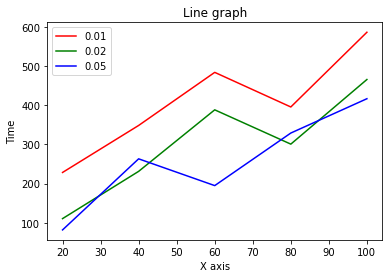

In [57]:
x = np.arange(20, 120, 20)
plt.title("Line graph")
plt.xlabel("Percentage of Dataset")
plt.ylabel("Time")
plt.plot(x, durations[0:13:3], color = "red", label = '0.01')
plt.plot(x, durations[1:14:3], color = "green", label = '0.02')
plt.plot(x, durations[2:15:3], color = "blue", label = '0.05')
plt.legend()
plt.show()